In [17]:
conda activate tensorflow

usage: conda [-h] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'build', 'content-trust', 'convert', 'debug', 'develop', 'doctor', 'index', 'inspect', 'metapackage', 'render', 'skeleton', 'token', 'pack', 'verify', 'env', 'repo', 'server')

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade numpy

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/2f/ac/be1f2767b7222347d2fefc18d8d58e9febfd9919190cc6fbd8a4d22d6eab/numpy-1.26.2-cp310-cp310-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 8.2 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires libclang>=13.0.0, which is not installed.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

Pandas version: 2.1.1
NumPy version: 1.26.2


In [3]:
import torch
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, random_split, DataLoader
from torch import nn
import torchvision.transforms as transforms 
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sn
import numpy as np
import pandas as pd
import os
from PIL import Image

In [4]:
model_path = "/Users/shalinishah27/Desktop/FinalYearProject/fireandsmoke(final)/model/model.path"
training_dataset = "/Users/shalinishah27/Desktop/FinalYearProject/fireandsmoke(final)/Final_Dataset"

In [5]:
dataset = ImageFolder(training_dataset)
print(f'number of images: {len(dataset)}')
print(f'number of classes: {len(dataset.classes)}')
class_names = dataset.classes
print(class_names)
class_dictionary = {}
for i in range(len(dataset.classes)):
    class_dictionary[class_names[i]] = 0

for i in range(len(dataset)):
    img, img_label = dataset[i]
    class_dictionary[class_names[img_label]] += 1


number of images: 497
number of classes: 3
['Images_fire', 'Images_neutral', 'Images_smoke']


In [6]:
print("Number of Images Per Classes")
print("----------------------------")
class_dictionary

Number of Images Per Classes
----------------------------


{'Images_fire': 163, 'Images_neutral': 226, 'Images_smoke': 108}

In [7]:
KeyList=list(class_dictionary.keys())
ValueList=list(class_dictionary.values())

Text(0, 0.5, 'Number of Images')

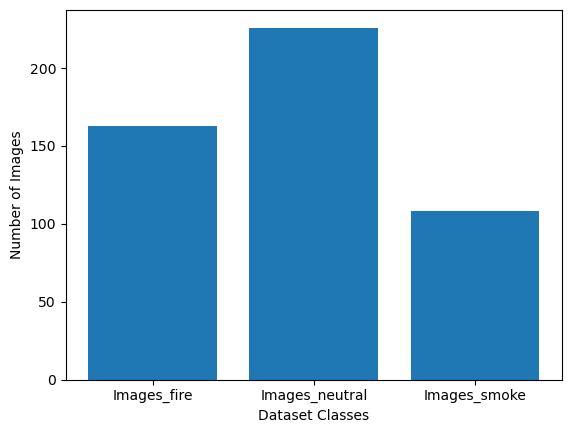

In [8]:
plt.bar(KeyList,ValueList)
plt.xlabel("Dataset Classes")
plt.ylabel("Number of Images")

In [9]:
test_image_percentage = 0.25
test_dataset_size = int(len(dataset)*test_image_percentage)
print(test_dataset_size)
train_dataset_size = len(dataset) - test_dataset_size
train_dataset_split, test_dataset_split = random_split(dataset, [train_dataset_size, test_dataset_size])
print(len(train_dataset_split))

124
373


In [10]:
class FireAndSmaoke(Dataset):
    
    def __init__(self, ds, transform=None):
        self.ds = ds
        self.transform = transform
        
    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        img, label = self.ds[idx]
        if self.transform:
            img = self.transform(img)  
            return img, label

In [11]:
batch_size = 100

train_transform = transforms.Compose([
   transforms.Resize((50,50)),
    transforms.ToTensor()    
])


test_transform = transforms.Compose([
    transforms.Resize((50,50)), 
    transforms.ToTensor()
])

In [12]:
train_dataset = FireAndSmaoke(train_dataset_split, train_transform)
test_dataset = FireAndSmaoke(test_dataset_split, test_transform)

train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size)

In [13]:
for images,data_label in train_dataloader:
    break
    
print('Label:', data_label.numpy())
print('Class:', *np.array([class_names[i] for i in data_label]))

im = make_grid(images, nrow=8)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

Label: [1 1 1 2 1 2 2 0 2 1 2 1 1 0 1 1 0 2 0 0 0 0 0 0 2 1 1 2 0 0 1 1 2 0 2 0 1
 1 1 2 2 0 1 0 1 1 0 0 0 2 1 0 2 0 1 2 0 0 0 2 1 0 0 1 1 0 1 1 0 1 1 0 2 0
 1 1 0 1 1 0 2 2 1 1 1 0 0 2 1 2 1 2 0 1 2 1 1 1 0 0]
Class: Images_neutral Images_neutral Images_neutral Images_smoke Images_neutral Images_smoke Images_smoke Images_fire Images_smoke Images_neutral Images_smoke Images_neutral Images_neutral Images_fire Images_neutral Images_neutral Images_fire Images_smoke Images_fire Images_fire Images_fire Images_fire Images_fire Images_fire Images_smoke Images_neutral Images_neutral Images_smoke Images_fire Images_fire Images_neutral Images_neutral Images_smoke Images_fire Images_smoke Images_fire Images_neutral Images_neutral Images_neutral Images_smoke Images_smoke Images_fire Images_neutral Images_fire Images_neutral Images_neutral Images_fire Images_fire Images_fire Images_smoke Images_neutral Images_fire Images_smoke Images_fire Images_neutral Images_smoke Images_fire Images_fire Images_f

In [14]:
def TrainModel(model,optimizer,dataloader,device):
    loss_list = []
    acc_list = []
    correct = total = 0
    for i,(x_train,y_train) in enumerate(dataloader):
        x_train = x_train.requires_grad_()
        x_train.to(device)
        y_train = y_train.to(device)
        
        
        outputs= model(x_train)
        criterion = nn.CrossEntropyLoss()
        loss = criterion(outputs,y_train)
        
        # Backprop and optimisation
        optimizer.zero_grad()
        loss.backward()  
        optimizer.step()

        
        with torch.no_grad():
                _,predicted = torch.max(outputs.data,1)
                total += y_train.size(0)
                correct += (predicted == y_train).sum().item()
                accuracy = (correct/total)*100
        
        loss_list.append(loss.item())          #forward pass
        acc_list.append(accuracy)   #Train Accuracy

    return loss_list, acc_list

In [15]:
def TestModel(model,dataloader,device):
    loss_list = []
    acc_list = []
    total = correct = 0
    predict = []
    labels = []
    for i,(x_test,y_test) in enumerate(dataloader):
        x_test.to(device)
        y_test.to(device)
        labels.extend(y_test)
        with torch.no_grad():
         
            output = model(x_test)
            criterion = nn.CrossEntropyLoss()
            loss = criterion(output,y_test)
            _,predicted = torch.max(output.data,1)
            predict.extend(predicted)
            total += y_test.size(0)
            correct += (predicted == y_test).sum().item()
            accuracy = (correct/total)*100
            
        loss_list.append(loss.item())
        acc_list.append(accuracy)
#         print(labels)
        
    return sum(loss_list)/len(loss_list), sum(acc_list)/len(acc_list),labels,predict

In [16]:
class ConvolutionNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionNeuralNetwork,self).__init__()
        self.network = nn.Sequential(
#                                       nn.Conv2d(3, 16, kernel_size=3, stride=1,padding=1,bias=True),
#                                       nn.ReLU(inplace=True),
#                                       nn.MaxPool2d(kernel_size=3, stride=2),
                                     
#                                       nn.Conv2d(16, 32, kernel_size=3, stride=1,padding = 1,bias=True), 
#                                       nn.ReLU(inplace=True),
#                                       nn.MaxPool2d(kernel_size=3, stride=2),
                                     
#                                       nn.Conv2d(32, 32, kernel_size=3, stride=1,padding = 1,bias=True),
#                                       nn.ReLU(inplace=True),
#                                       nn.MaxPool2d(kernel_size=3, stride=2),
                        
#                                       nn.Conv2d(32, 64, kernel_size=3, stride=1,padding = 1,bias=True),
#                                       nn.ReLU(inplace=True),
#                                       nn.MaxPool2d(kernel_size=3, stride=1),
                                     
#                                       nn.Dropout(p=0.3),
#                                       nn.Flatten(),
#                                       nn.Linear(32 * 5*5, 196),
# #                                       nn.Linear(216, 196),
#                                       nn.Linear(196, 5),
                                        nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1,bias=True),
                                        nn.ReLU(inplace=True),
                                        nn.MaxPool2d(kernel_size=3, stride=2),
                                     
                                        nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1,bias=True), 
                                        nn.ReLU(inplace=True),
                                        nn.MaxPool2d(kernel_size=3, stride=2),

                                        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1,bias=True),
                                        nn.ReLU(inplace=True),
                                        nn.MaxPool2d(kernel_size=3, stride=2),
                        
#                                         nn.Conv2d(48, 64, kernel_size=3, stride=1, padding=1,bias=True),
#                                         nn.ReLU(inplace=True),
#                                         nn.MaxPool2d(kernel_size=3, stride=2),
            
                                        nn.Dropout(p=0.3),
                                        nn.Flatten(),
                                        nn.Linear(64*5*5, 128),
                                        nn.Linear(128, 64),
                                        nn.Linear(64, 32),
                                        nn.Linear(32, 5)
                                    )
        
    
    def forward(self,x):
        return self.network(x)

In [17]:
epochs =25
learning_rate = 0.001

device = "cpu"
print(f'device: {device}')


CNNmodel = ConvolutionNeuralNetwork()
CNNmodel.to(device)

optimizer = torch.optim.Adam(CNNmodel.parameters(), learning_rate)

train_loss_list = []
train_acc_list = []

test_loss_list = []
test_acc_list = []

for epoch in range(epochs):
    print(f'epoch: {epoch}')
    train_loss,train_accuracy = TrainModel(CNNmodel,optimizer,train_dataloader,device)
    test_loss , test_accuracy,labels,predict = TestModel(CNNmodel,test_dataloader,device)
    train_loss_list.extend(train_loss)
    train_acc_list.extend(train_accuracy)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_accuracy)
    
    print('\t training loss/accuracy: {0:.2f}/{1:.2f}'.format(sum(train_loss)/len(train_loss), sum(train_accuracy)/len(train_accuracy)))
    print('\t testing loss/accuracy: {0:.2f}/{1:.2f}'.format(test_loss, test_accuracy))

torch.save(CNNmodel, model_path)

device: cpu
epoch: 0
	 training loss/accuracy: 1.47/46.63
	 testing loss/accuracy: 1.39/42.66
epoch: 1
	 training loss/accuracy: 1.21/46.46
	 testing loss/accuracy: 1.18/42.66
epoch: 2
	 training loss/accuracy: 1.08/50.55
	 testing loss/accuracy: 1.09/47.98
epoch: 3
	 training loss/accuracy: 1.02/48.62
	 testing loss/accuracy: 1.06/48.89
epoch: 4
	 training loss/accuracy: 0.97/54.77
	 testing loss/accuracy: 0.98/51.90
epoch: 5
	 training loss/accuracy: 0.88/54.55
	 testing loss/accuracy: 0.83/58.53
epoch: 6
	 training loss/accuracy: 0.86/60.30
	 testing loss/accuracy: 1.01/58.23
epoch: 7
	 training loss/accuracy: 0.81/58.82
	 testing loss/accuracy: 0.82/59.84
epoch: 8
	 training loss/accuracy: 0.79/60.60
	 testing loss/accuracy: 0.92/59.53
epoch: 9
	 training loss/accuracy: 0.78/59.77
	 testing loss/accuracy: 0.83/62.55
epoch: 10
	 training loss/accuracy: 0.76/63.92
	 testing loss/accuracy: 0.88/64.45
epoch: 11
	 training loss/accuracy: 0.72/63.05
	 testing loss/accuracy: 0.82/65.26
ep

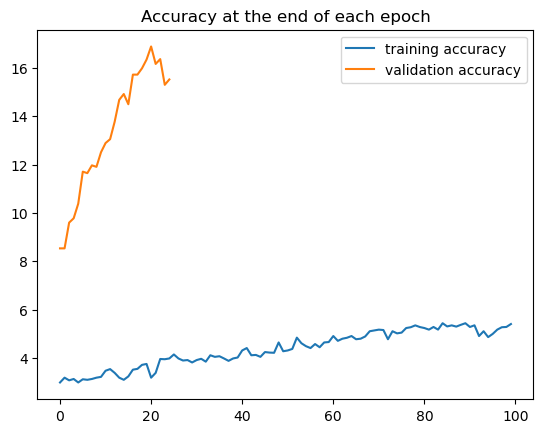

In [18]:
plt.plot([t*100/1509 for t in train_acc_list], label='training accuracy')
plt.plot([t*100/500 for t in test_acc_list], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [19]:
print(classification_report(labels,predict, target_names=class_names))
print(confusion_matrix(labels,predict))

                precision    recall  f1-score   support

   Images_fire       0.83      0.81      0.82        48
Images_neutral       0.84      0.76      0.80        50
  Images_smoke       0.62      0.77      0.69        26

      accuracy                           0.78       124
     macro avg       0.77      0.78      0.77       124
  weighted avg       0.79      0.78      0.79       124

[[39  4  5]
 [ 5 38  7]
 [ 3  3 20]]


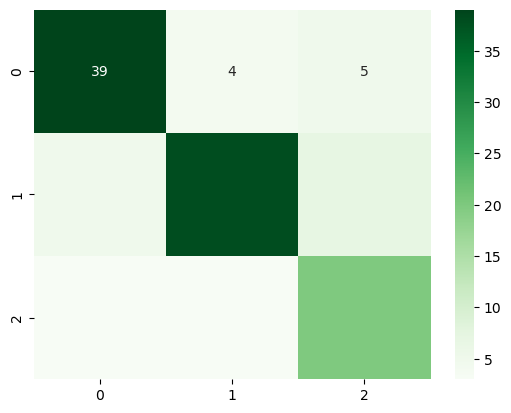

In [20]:
cm_train=confusion_matrix(labels,predict)
categories=['Images_fire', 'Images_neutral', 'Images_smoke']
df_confusion_matrix=pd.DataFrame(cm_train,categories,categories)
sn.heatmap(cm_train,cmap="Greens",annot=True)
plt.show()


In [21]:
gen_model = torch.load(model_path) 
image = ImageFolder(training_dataset)
test_image = FireAndSmaoke(image, test_transform)
test_data = DataLoader(test_image, 10)
test_loss , test_accuracy,l,p = TestModel(gen_model,test_data,device)

In [22]:
print(classification_report(l,p, target_names=class_names))
print(confusion_matrix(l,p))

                precision    recall  f1-score   support

   Images_fire       0.76      0.89      0.82       163
Images_neutral       0.92      0.72      0.81       226
  Images_smoke       0.70      0.82      0.75       108

      accuracy                           0.80       497
     macro avg       0.79      0.81      0.79       497
  weighted avg       0.82      0.80      0.80       497

[[145   7  11]
 [ 35 163  28]
 [ 11   8  89]]


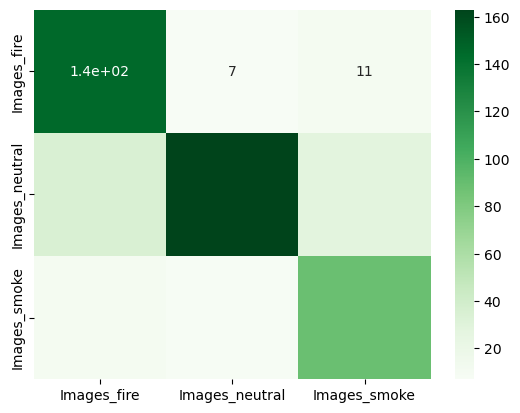

In [23]:
cm_test=confusion_matrix(l,p)
categories=['Images_fire', 'Images_neutral', 'Images_smoke']
dataframe_confusion_matrix=pd.DataFrame(cm_test,categories,categories)
sn.heatmap(dataframe_confusion_matrix,cmap="Greens",annot=True)
plt.show()

In [24]:
def detect_fire_smoke_neutral(model, image_path, transform):
    
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    return class_names[predicted[0].item()]

# Example usage
image_path = '/Users/shalinishah27/Desktop/FinalYearProject/fireandsmoke(final)/Final_Dataset/Images_smoke/7.jpg'  # Replace with your image path
label = detect_fire_smoke_neutral(CNNmodel, image_path, test_transform)
print(f"The image is classified as: {label}")

The image is classified as: Images_smoke
